# Exploratory Data Analysis

In [1]:
# Handle Missing value
# Removing duplicates
# Outlier Treatment
# Normalizing and Scaling( Numerical Variables)
# Encoding Categorical variables( Dummy Variables)
# Bivariate Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housedata = pd.read_csv('data/HouseData.csv')
housedata.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Number of Rows
housedata['Id'].count() 

1460

In [5]:
# Check how many nulls are there in full data
housedata.isnull().sum().sum()

6965

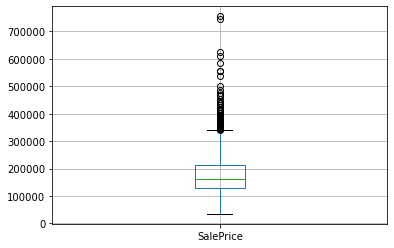

In [6]:
housedata.boxplot(column='SalePrice')

In [7]:
# Find the no of rows and columns - 1460 rows, 81 columns
housedata.shape

(1460, 81)

In [8]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Calculate Median and mode for null values
 
lotfrontagemedian = housedata['LotFrontage'].median()
alleymode = housedata['Alley'].mode().values[0]
masvnrtypemode = housedata['MasVnrType'].mode().values[0]
masvnrareamode = housedata['MasVnrArea'].mode().values[0]
bsmtqualmode = housedata['BsmtQual'].mode().values[0]
bmstcond = housedata['BsmtCond'].mode().values[0]
bsmtexp = housedata['BsmtExposure'].mode().values[0]
bsmtfintyp1 = housedata['BsmtFinType1'].mode().values[0]
bsmtfintyp2 = housedata['BsmtFinType2'].mode().values[0]
elec = housedata['Electrical'].mode().values[0]
fireplace = housedata['FireplaceQu'].mode().values[0]
grgtype = housedata['GarageType'].mode().values[0]
grgyr = housedata['GarageYrBlt'].mode().values[0]
grgfnsh = housedata['GarageFinish'].mode().values[0]
grgqual = housedata['GarageQual'].mode().values[0]
grgcond = housedata['GarageCond'].mode().values[0]
# housedata['PoolQC'] - ignore as only 7 rows have value
fence = housedata['Fence'].mode().values[0]
# housedata['MiscFeature'] - ignore as only 54 rows have value

In [10]:
# assign mode and median for null values

housedata['LotFrontage'] = housedata['LotFrontage'].replace(np.nan,lotfrontagemedian)
housedata['Alley'] = housedata['Alley'].replace(np.nan,alleymode)
housedata['MasVnrType'] = housedata['MasVnrType'].replace(np.nan,masvnrtypemode)
housedata['MasVnrArea'] = housedata['MasVnrArea'].replace(np.nan,masvnrareamode)
housedata['BsmtQual'] = housedata['BsmtQual'].replace(np.nan,bsmtqualmode)
housedata['BsmtCond'] = housedata['BsmtCond'].replace(np.nan,bmstcond)
housedata['BsmtExposure'] = housedata['BsmtExposure'].replace(np.nan,bsmtexp)
housedata['BsmtFinType1'] = housedata['BsmtFinType1'].replace(np.nan,bsmtfintyp1)
housedata['BsmtFinType2'] = housedata['BsmtFinType2'].replace(np.nan,bsmtfintyp2)
housedata['Electrical'] = housedata['Electrical'].replace(np.nan,elec)
housedata['FireplaceQu'] = housedata['FireplaceQu'].replace(np.nan,fireplace)
housedata['GarageType'] = housedata['GarageType'].replace(np.nan,grgtype)
housedata['GarageYrBlt'] = housedata['GarageYrBlt'].replace(np.nan,grgyr)
housedata['GarageFinish'] = housedata['GarageFinish'].replace(np.nan,grgfnsh)
housedata['GarageQual'] = housedata['GarageQual'].replace(np.nan,grgqual)
housedata['GarageCond'] = housedata['GarageCond'].replace(np.nan,grgcond)
housedata['Fence'] = housedata['Fence'].replace(np.nan,fence)

In [11]:
# check for any more null values - we wil ignore these two columns

housedata.isna().any()[lambda x: x]

PoolQC         True
MiscFeature    True
dtype: bool

In [12]:
# drop the two columns as they have many nulls

housedata1 = housedata.drop(['PoolQC','MiscFeature'],axis=1)

# chk if there any more nulls
housedata1.isnull().sum().sum()

0

In [13]:
# Check for duplicate records - 0 means no duplicates

housedata1.duplicated().sum()

0

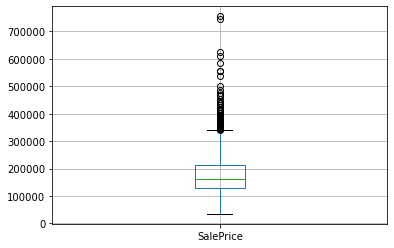

In [14]:
# Handling Outliers

housedata1.boxplot(column='SalePrice')
plt.show()

Outliers can be treated in two ways:
    1. Drop the outlier value (row)
    2. Replace with value using IQR (inter quartile range)

In [15]:
# Function to remove outlier

def remove_outlier(col):
    sorted(col)
#     Q1,Q3 = col.quantile([0.25,0.75])
    Q1 = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR = Q3-Q1
    lower_range = Q1
    upper_range = Q3
    return lower_range,upper_range

In [16]:
remove_outlier(housedata1['SalePrice'])

(129975.0, 214000.0)

In [17]:
lowprice,upperprice = remove_outlier(housedata1['SalePrice'])
housedata1['SalePrice']=np.where(housedata1['SalePrice'] > upperprice,upperprice,housedata1['SalePrice'])
housedata1['SalePrice']=np.where(housedata1['SalePrice'] > lowprice,lowprice,housedata1['SalePrice'])

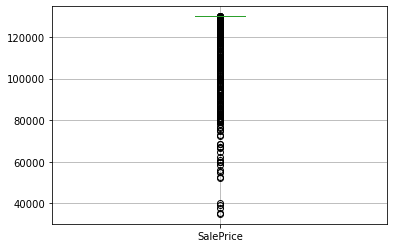

In [18]:
housedata1.boxplot(column='SalePrice')
plt.show()

# Bivariate Analysis

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

Numerical vs Numerical:
    1. Scatterplot
    2. Lineplot
    3. Heatmap for correlation
    4. Jointplot
Categorical vs Numerical:
    1. Bar chart
    2. Violin plot
    3. Categorical box plot
    4. Swarm plot
Two Categorical variables:
    1. Bar chart
    2. Grouped bar chart
    3. Point plot

# Scaling the values (Z Score):


Often the variables of the data set are of different scales i.e. one variable is in millions and others in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale. StandardScaler normalizes the data using the formula (x-mean)/standard deviation. We will be doing this only for the numerical variables.


In [22]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [31]:
housedata1['GrLivArea'].median()

-0.097970036308437

In [32]:
housedata1['LotArea'] = std_scale.fit_transform(housedata1[['LotArea']])
housedata1['GrLivArea'] = std_scale.fit_transform(housedata1[['GrLivArea']])

In [33]:
housedata1['GrLivArea'].median()

-0.097970036308437